# DATA PROCESSING 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# A helper function that converts 
# ["a", "b", "a", "c"] into
# [1, 2, 1, 3]
# This allows the machine learning algorithims to work on integers instead of strings
def categorize(l):
    uniques = sorted(list(set(l)))
    return [uniques.index(x) + 1 for x in l]

In [2]:
df = pd.read_csv(r'C:\Users\bhavy\Desktop\INFO_DS\Project3_Data\lending-club-loan-data\loan.csv', low_memory =False)
pd.set_option('display.max_columns',None)
df.fillna(0,inplace=True)
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,0,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,0.0,0.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,0,Jan-2016,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,0.0,0.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,0,Sep-2013,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,0,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,0,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,0.0,0.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,0,Jan-2016,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# DATA REMOVAL

In [3]:
# Drop unneccesary columns
df = df.drop(['url', 'desc', 'policy_code', 'last_pymnt_d', 'next_pymnt_d', 'earliest_cr_line', 'emp_title'], axis=1)
df = df.drop(['id', 'title', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'zip_code'], axis=1)

In [4]:
i = len(df)
df = pd.DataFrame(df[df['loan_status'] != "Does not meet the credit policy. Status:Fully Paid"])
df = pd.DataFrame(df[df['loan_status'] != "Does not meet the credit policy. Status:Charged Off"])
df = pd.DataFrame(df[df['loan_status'] != "Issued"])
df = pd.DataFrame(df[df['loan_status'] != "In Grace Period"])
a = len(df)
print(f"We dropped {i-a} rows, a {((i-a)/((a+i)/2))*100}% reduction in rows")

We dropped 17462 rows, a 1.987371507133687% reduction in rows


In [5]:
df.info()
df.to_csv('cleanData.csv', sep='\t', encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869917 entries, 0 to 887378
Data columns (total 61 columns):
member_id                      869917 non-null int64
loan_amnt                      869917 non-null float64
funded_amnt                    869917 non-null float64
funded_amnt_inv                869917 non-null float64
term                           869917 non-null object
int_rate                       869917 non-null float64
installment                    869917 non-null float64
grade                          869917 non-null object
sub_grade                      869917 non-null object
emp_length                     869917 non-null object
home_ownership                 869917 non-null object
annual_inc                     869917 non-null float64
verification_status            869917 non-null object
issue_d                        869917 non-null object
loan_status                    869917 non-null object
pymnt_plan                     869917 non-null object
purpose             

# ANALYSIS

In [6]:
# make temporary dataframe in order to keep original dataframe
df_copy = df.copy()
df_copy["emp_length"] = ["0.5" if x == '< 1 year' else x for x in df_copy["emp_length"]]

# check employment length
df_copy.emp_length.unique()

array(['10+ years', '0.5', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 0],
      dtype=object)

In [7]:
# Using regex to easy convert

df_copy['emp_length'].replace(regex=True,inplace=True,to_replace=r'years',value=r'')
df_copy['emp_length'].replace(regex=True,inplace=True,to_replace=r'year',value=r'')
df_copy['emp_length'].replace(regex=True,inplace=True,to_replace=r'10+ ',value=r'10')
df_copy['emp_length'].replace(regex=True,inplace=True,to_replace=r'< 1',value=r'10')
df_copy['emp_length'] = df_copy['emp_length'].replace('10+ ','10')




f = pd.value_counts(df_copy['emp_length']).to_frame().reset_index()
f.columns = ['type','count']




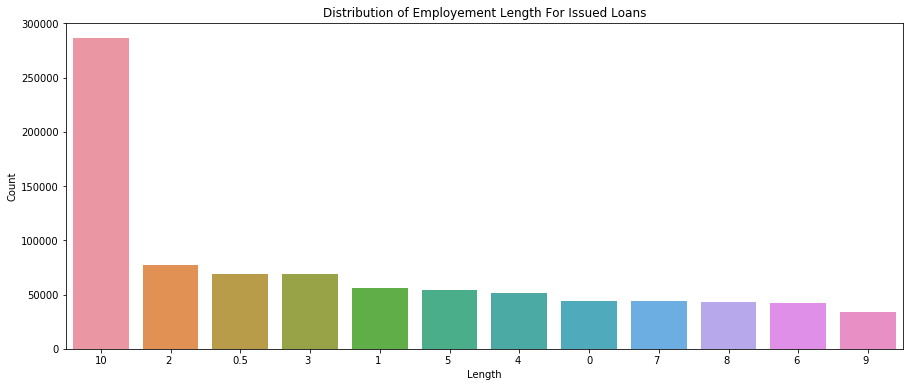

In [8]:
plt.subplots(figsize=(15,6))
sns.barplot(y='count', x='type', data=f)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

C:\Users\bhavy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


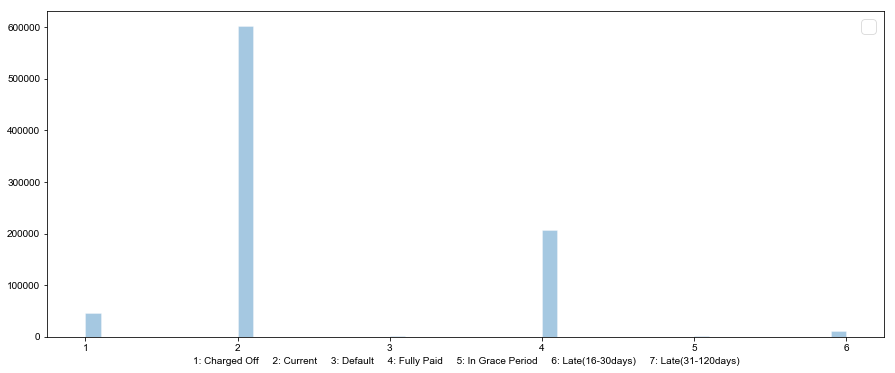

In [9]:
'''
legend = {5:("Late (16-30 days)",'b'),
          6:("Late (31-120 days)",'yellow'),
          3:("Default",'magenta'),
          2:("Current", "orange"),
          1:("Charged Off","#512888"),
          4:("Fully Paid","#f7cfcf")}
'''
legend = "1: Charged Off     2: Current     3: Default     4: Fully Paid     5: In Grace Period     6: Late(16-30days)     7: Late(31-120days)"


plt.subplots(figsize=(15,6))

sns.set_context("paper", font_scale=2)
sns.set_style("white")
a = sns.distplot(categorize(df_copy["loan_status"]), kde=False)
a.set(xlabel=legend)
plt.legend()
plt.show()

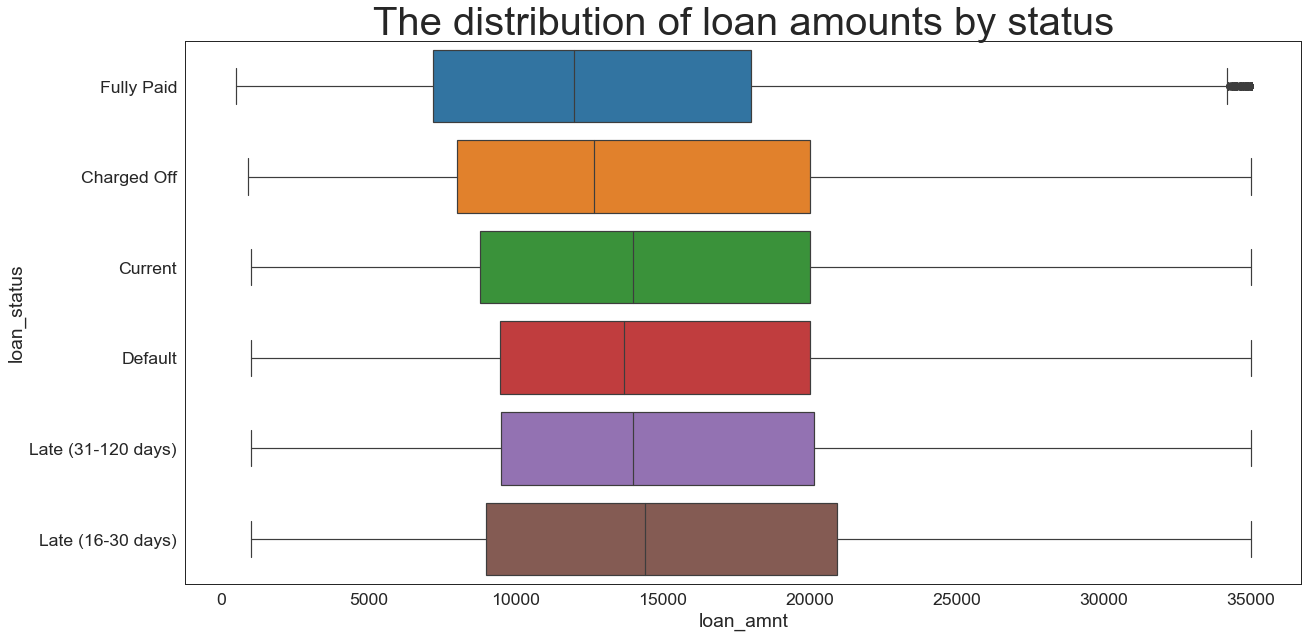

In [10]:
# Loan amount by its status
plt.subplots(figsize=(20,10))
plt.title("The distribution of loan amounts by status").set_size(40)
sns.boxplot(x="loan_amnt", y="loan_status", data=df_copy)

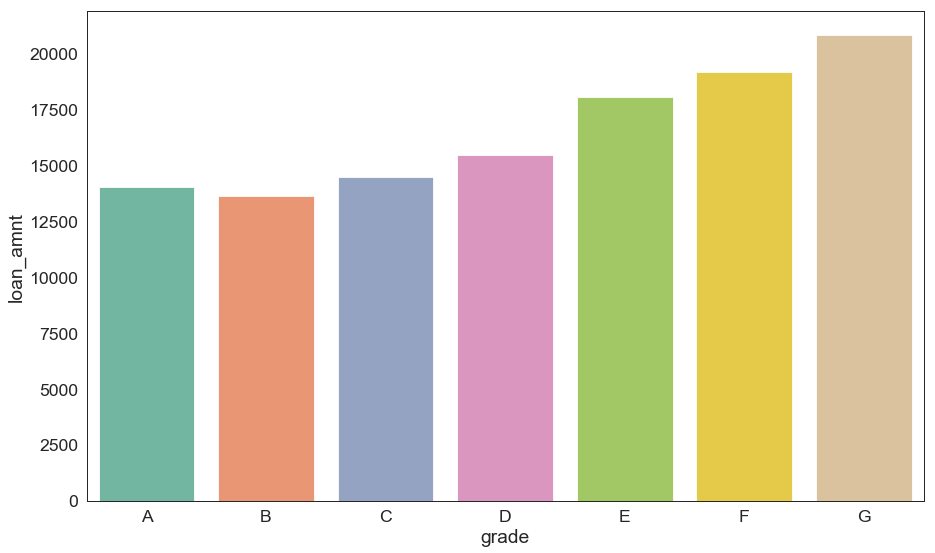

In [11]:
group = df_copy.groupby("grade").mean()
avg_loan = group['loan_amnt'].reset_index()
plt.subplots(figsize=(15,9))
sns.barplot(x='grade', y='loan_amnt', data=avg_loan, palette='Set2')

In [12]:
plt.clf()

<Figure size 432x288 with 0 Axes>

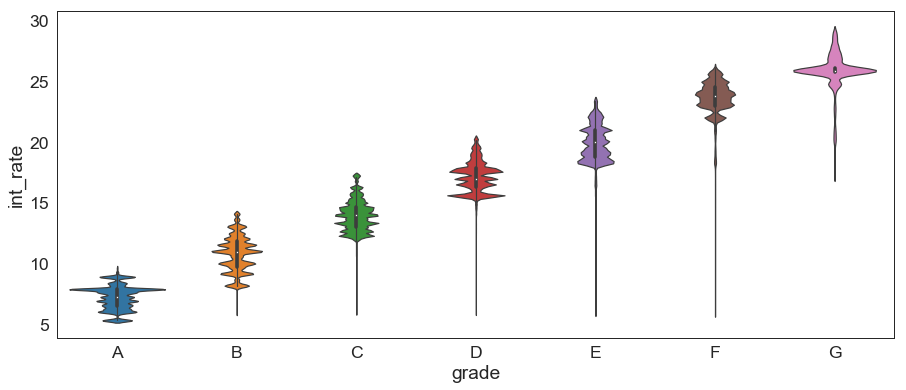

In [13]:
plt.subplots(figsize=(15,6))
sns.violinplot(x="grade", y="int_rate", data=df_copy, order="ABCDEFG")

In [14]:
print("% of loans that are current or fully paid by grade")
print(f"A: {round((103322+39679)/(2617+103322+47+39679+365+134+492) * 100, 2)}%")
print(f"B: {round((171735+66546)/(9519+171735+198+66546+1240+410+2004) * 100, 2)}%")
print(f"C: {round((171175+52678)/(12642+171175+360+52678+1887+678+3339) * 100, 2)}%")
print(f"D: {round((91984+30020)/(10486+91984+312+30020+1405+369+2890) * 100, 2)}%")
print(f"E: {round((47061+12928)/(6258+47061+201+12928+908+368+1852) * 100, 2)}%")
print(f"F: {round((13589+4726)/(2934+13589+79+4726+354+155+768)* 100, 2)}%")
print(f"G: {round((2913+1146)/(792+2913+22+1146+94+42+246)* 100, 2)}%")
pd.pivot_table(df, index="loan_status", columns="grade", aggfunc="size")

% of loans that are current or fully paid by grade
A: 97.51%
B: 94.69%
C: 92.21%
D: 88.75%
E: 86.22%
F: 81.02%
G: 77.24%


grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,2617,9519,12642,10486,6258,2934,792
Current,103322,171735,171175,91984,47061,13589,2913
Default,47,198,360,312,201,79,22
Fully Paid,39679,66546,52678,30020,12928,4726,1146
Late (16-30 days),134,410,678,569,368,155,43
Late (31-120 days),492,2004,3339,2890,1852,768,246


In [15]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [16]:
# create dataframe that holds values by state.

# create loan amount by state column
loan_amnt_by_state = df_copy.groupby(["addr_state"]).sum()["loan_amnt"]
df_region = loan_amnt_by_state.to_frame()
df_region["loan_amnt"] = df_region["loan_amnt"].map("{:,.0f}".format)
temp = []
for x in df_region["loan_amnt"]:
    a = int(x.replace(',', ''))
    temp.append(a)
df_region["loan_amnt"] = temp

# create number of loan issued by state column
num_issued_loan = df_copy.groupby(["addr_state"]).count()["member_id"]
df_region["num_issued"] = num_issued_loan

# create average loan amount column
avg_loan_amnt_by_state = []
for a,b in zip(df_region["loan_amnt"], df_region["num_issued"]):
    temp = int(a/b)
    avg_loan_amnt_by_state.append(temp)
df_region["avg_loan_amnt_by_state"] = avg_loan_amnt_by_state



In [17]:
# change index from state abbreviation to numeric value
df_region_copy = df_region.copy()
addr_state = df_region_copy.index
df_region.index = list(range(1,52))
df_region["addr_state"] = addr_state

In [18]:
# add more columns

# create num_default column 
d = df_copy[df_copy["loan_status"].isin(["Late (16-30 days)","Late (31-120 days)","Default", "Charged Off", "Does not meet the credit policy. Status:Charged Off"])].groupby("addr_state").size()
d = d.to_frame()
e = pd.DataFrame([0],index=["ME"])
f = pd.concat([d,e])
f_copy = f.copy()
addr_state = f_copy.index
f.index = list(range(1,52))
f["addr_state"] = addr_state
f = f.sort_values(by="addr_state")
f.index = list(range(1,52))
df_region["num_default"] = f[0]

# create default_rate column
temp = []
for x, y in zip(df_region["num_default"], df_region["num_issued"].astype(int)):
    if x is not 0 and y is not 0:
        value = (x/y)
        value = "{0:.2f}".format(value)
        value = float(value)
        temp.append(value)
    else:
        temp.append(0)
df_region["default_rate"] = temp

# create average dti by the state
dti = df_copy.groupby("addr_state").agg([np.mean])["dti"]
dti.columns = ["dti"]
dti.index = list(range(1,52))
df_region = df_region.join(dti)

In [19]:
# plotly color setting
for col in df_region.columns:
    df_region[col] = df_region[col].astype(str)
    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


# create text column
df_region["text"] = df_region["addr_state"] + '<br>' + \
"Total loan amount ($ USD): " + df_region["loan_amnt"] + "<br>" + \
"Avg loan amount ($ USD): " + df_region["avg_loan_amnt_by_state"] + '<br>' + \
"Default rate: " + df_region["default_rate"] + "<br>" + \
"DTI: " + df_region["dti"]

In [20]:
# setting plotly and deploy the map
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_region['addr_state'],
        z = df_region['avg_loan_amnt_by_state'], 
        locationmode = 'USA-states',
        text = df_region['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]

layout = dict(
        title = 'Lending Club Loan<br> Average Loan By State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

PART G : EXPLORATORY DATA

G1 : Heat Map

In [21]:
# create new dataset for exploratory analysis
df_exp = pd.DataFrame()
df_exp['annual_inc'] = df_copy['annual_inc']
df_exp['delinq_2yrs'] = df_copy['delinq_2yrs']
df_exp['dti'] = df_copy['dti']
#df_exp['emp_length'] = categorize(df_copy['emp_length'])
df_exp['grade'] = categorize(df_copy['grade'])
df_exp['home_ownership'] = categorize(df_copy['home_ownership'])
df_exp['installment'] = df_copy['installment']
df_exp['int_rate'] = df_copy['int_rate']
df_exp['loan_amnt'] = df_copy['loan_amnt']
df_exp['loan_status'] = categorize(df_copy['loan_status'])
df_exp['purpose'] = categorize(df_copy['purpose'])
df_exp['sub_grade'] = categorize(df_copy['sub_grade'])
df_exp['term'] = categorize(df_copy['term'])
df_exp['acc_now_delinq'] = df_copy['acc_now_delinq']

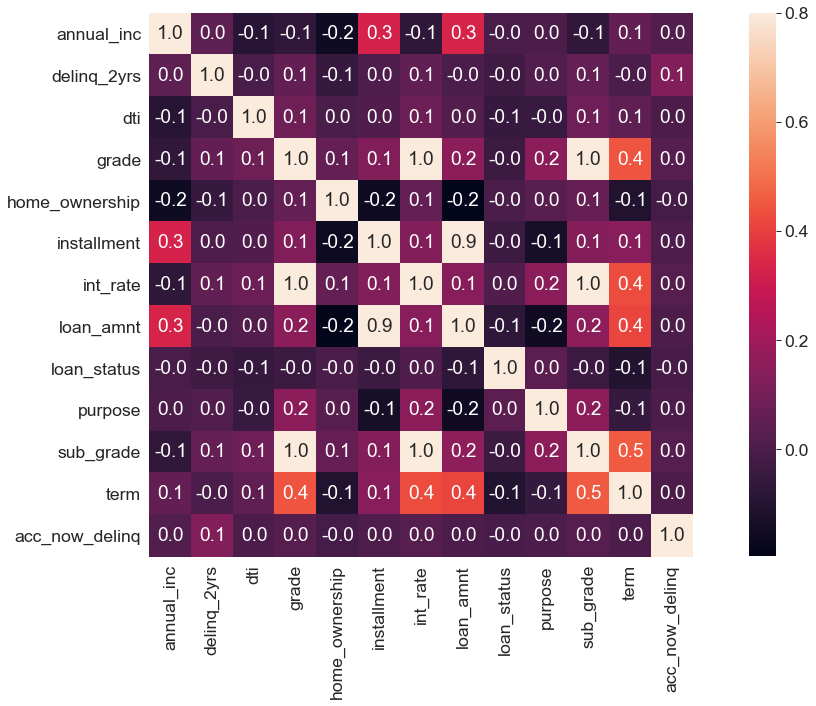

In [22]:
plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale=2)
sns.heatmap(df_exp.corr(), vmax=.8, square=True, annot=True, fmt='.1f')

G2 : Statistical Testing

In [23]:
# import necessary libraries for statistical testing
from scipy import stats
from pandas.tools import plotting

In [24]:
high_grade = df_exp[df_exp["grade"] < 4]["loan_status"]
low_grade = df_exp[df_exp["grade"] >= 4]["loan_status"]
two_samples = stats.ttest_ind(high_grade, low_grade)
print("The t-statistic is %.3f and the p-value is %.3f" % two_samples)

The t-statistic is 22.358 and the p-value is 0.000


In [25]:
shorter_term = df_exp[df_exp.term == 1]["loan_status"]
longer_term = df_exp[df_exp.term == 2]["loan_status"]
two_samples = stats.ttest_ind(shorter_term, longer_term)
print("The t-statistic is %.3f and the p-value is %.3f" % two_samples)

The t-statistic is 98.514 and the p-value is 0.000


In [26]:
low_int_rate = df_exp[df_exp["int_rate"] < 16.00]["loan_status"]
high_int_rate = df_exp[df_exp["int_rate"] >= 16.00]["loan_status"]
two_samples = stats.ttest_ind(low_int_rate, high_int_rate)
print("The t-statistic is %.3f and the p-value is %.3f" % two_samples)

The t-statistic is 5.009 and the p-value is 0.000
